Machine Learning Lab 3 - Arailym Kaiyrova

In [ ]:
import numpy as np
import math
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

Exercise 1: Gradient Descent on Rosenbrock function

1.1 3D plot of Rosenbrock function

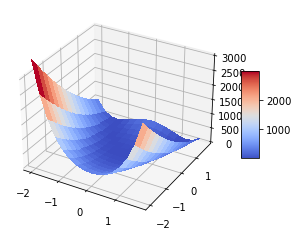

In [633]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (a-X)**2+b*(Y-X**2)**2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 3000)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.4, aspect=5)
plt.show()

1.2 Partial derivatives of the Rosenbrock function

$$ \Delta f=  \begin{pmatrix} \frac{\partial f(x,y)}{\partial x}\\
\frac{\partial f(x,y)}{\partial y} \end{pmatrix}  = \begin{pmatrix} -2(a-x)-4bx(y-x^2)\\
2b(y - x^2) \end{pmatrix} $$


1.3 Code representations of the function, and its partial derivatives

In [656]:
def f(a, b, x, y):
    return (a-x)**2+b*(y-(x**2))**2

def dx(a, b, x, y):
    return -2*(a-x)-4*b*x*(y-(x**2))

def dy(a, b, x, y):
    return 2*b*(y-(x**2))

1.4 Optimize the function with Gradient Descent
Initial parameters were set to x = y = 2, the values higher takes it too long to converge since the thay are away from the expected values of convergence, which are (a, a^2) = (1, 1).
The learning rate is set to 0.001, the rates higher than this leads to the divergence of the function output.
Also, maximum number of iterations was set to 1000. With the given initial parameters, function converges after seven iterations. Also, from the convergence of model parameters, it can be seen that model parameters (x, y) gradually converges towards (a, a^2).

In [690]:
x, y = 2, 2
a, b = 1, 100
r = 0.001
i_max = 1000
z = f(a, b, x, y)
X, Y, Z = [x], [y], [z] #vectors storing intermediate values of x, y, and corresponding z(f)
for i in range(i_max):

    z = f(a, b, x, y)
    x = x - r*dx(a, b, x, y)
    y = y - r*dy(a, b, x, y)
    
    X.append(x)
    Y.append(y)
    Z.append(z)
    
    print('Parameters after',i,'th iteration:', x, y, z)
    if i>0 and Z[i] - Z[i+1] < 0.00001: #convergence criteria
        break
print('i:',i, 'x:',X[-1], 'y:',Y[-1], 'z:', Z[-1])


Parameters after 0 th iteration: 0.3979999999999999 1.6316808 401
Parameters after 1 th iteration: 0.6337496665599999 1.3856723679729823 217.416856941824
Parameters after 2 th iteration: 0.8839345860557934 1.2648059648635113 96.96637711217188
Parameters after 3 th iteration: 1.0551075072846787 1.2344951422765067 23.387371021307896
Parameters after 4 th iteration: 1.1061671746117454 1.2323172774589117 1.4730303828005173
Parameters after 5 th iteration: 1.1098093723776665 1.2321891905705915 0.01886042122698995
Parameters after 6 th iteration: 1.1098171968795298 1.2320901945543807 0.012084348263512368
Parameters after 7 th iteration: 1.1097733504557121 1.231991533519844 0.012075497068438421
i: 7 x: 1.1097733504557121 y: 1.231991533519844 z: 0.012075497068438421


Exercise 2, Part A

Part A, Airfare dataset.\
For this dataset, data values, and column names were stored in two different files. That's why these two files handled separately, and joined in the end.\
\
Next step of data preprocessing was to convert any non-numeric values to numeric values. In this dataset four non-numneric columns 'City1','City2', 'market leading airline', 'Low price airline', which were hot-encoded using pd.get_dummies, which in the end extended the column numbers to 217.\
\
NA value rows were dropped using 'Dataframe.dropna()'\
\
Last step is to split data into, train, and test. The 'split_train_test' methods randomly splits the data into train and test according to given fraction of test data, which in this case is 0.8

In [691]:
def split_train_test(df, frac):
    train=df.sample(frac=frac,random_state=200) #random state is a seed value
    test=df.drop(train.index)
    return train, test

In [694]:
#Reading column names
cols = open('datasets/airq402.txt', 'r').read().split('\n')[9:]
names = []
for i in range(len(cols)):
    names.append(cols[i].split('   ')[0])

#Reading data values
df_airq = pd.DataFrame(pd.read_fwf('datasets/airq402.data', delimiter = "\s", header = None))
df_airq.columns = names #assigning column names from airq402.txt

hot_encoded = pd.get_dummies(df_airq, columns = ['City1','City2', 'market leading airline', 'Low price airline'])
hot_encoded = hot_encoded.dropna()
airq_train, airq_test = split_train_test(hot_encoded, 0.8)
hot_encoded.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share,price,City1_ABQ,City1_ACY,City1_ALB,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Part A, WIne quality dataset.\
Presprocessing of this data was similar to Airfare dataset, except hot-encoding part. Since this data don't have any non-numeric columns, these part was skipped

In [695]:
df_wine = pd.DataFrame(pd.read_csv('datasets/winequality-red.csv', delimiter = ";"))
df_wine = df_wine.dropna()
wine_train, wine_test = split_train_test(df_wine, 0.8)    
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Part A, Parkinsons dataset.\
Presprocessing of this data was also similar to Airfare dataset, and again skipping the hot-encoding part since this data don't have any non-numeric features.

In [696]:
df_parkinson = pd.DataFrame(pd.read_csv('datasets/parkinsons_updrs.data', delimiter = ","))
df_parkinson= df_parkinson.dropna()
parkinson_train, parkinson_test = split_train_test(df_parkinson, 0.8) 
df_parkinson.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


Exercise 2, Part B, Linear Regression with Real-World Data.\
\
In this task, I started with diving data into components X_train, Y_train, X_test, Y_test according to target column name, which was done by method 'return_data_components' below:

In [698]:
def return_data_components(trainset, testset, target):
    return trainset.drop([target], axis=1).to_numpy(),\
            trainset[target].to_numpy(),\
            testset.drop([target], axis=1).to_numpy(),\
            testset[target].to_numpy()    

airq_train_x, airq_train_y, airq_test_x, airq_test_y = return_data_components(airq_train, airq_test, 'price')
wine_train_x, wine_train_y, wine_test_x, wine_test_y = return_data_components(wine_train, wine_test, 'quality')
parkinson_train_x, parkinson_train_y, parkinson_test_x, parkinson_test_y =\
                return_data_components(parkinson_train, parkinson_test, 'total_UPDRS')

The loss function below calculates loss value according to given X, Y, and teta. Also, calculating the value of predicted Y is also part of loss calculation, that's why, in the end, the function returns loss value, and predicted values of Y:

In [699]:
def lossFunc(X, Y, teta):
    L = 0
    diff = np.zeros(len(Y))
    Y_PRED = np.zeros(len(Y))
    for i in range(len(Y)):
        for j in range(len(teta)):
            Y_PRED[i]+=(X[i,j]*teta[j])
        L+=pow(Y[i]-Y_PRED[i], 2)
    return L/len(Y), Y_PRED

Next step is to apply Gradient Descent to given X_train, Y_train, and learning rate, r until convergence, or until it reaches the maximum number of iteration given.\
\
First, it starts initializong model parameters, which I set to 0 for all paramters.\
Then, to update values of teta, we need to calculate gradient of loss function with current teta, and it is calculated by formula $\frac{\partial L}{\partial \theta}$ = -2/N$\sum$ X_train.T * (yk - yk_predicted)\
\
Then teta values are updated according to given learning rate, and gradient of loss\
\
If loss in converged, then stops the training\
Learning rate each was selected according to the highest values that doesn't make loss value increase after each iteration\
\
Furthermore, during each iteration predicted values of Y_test, and RMSE is calculated with current teta, and stored as a vector

In [748]:
def GSD(X_train, Y_train, i_max, r, X_test, Y_test):
    teta = [0]*X_train.shape[1]
    L, Y_PRED = lossFunc(X_train, Y_train, teta)
    loss = [L]
    RMSE = []
    
    y_pred_test = np.matmul(X_test, teta)
    RMSE.append(np.power(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0], 1/2))
    
    for i in range(i_max):
        diff = np.subtract(Y_train, Y_PRED)
        #Gradient of loss function
        loss_deriv = (-2/len(Y_train)*np.matmul(X_train.transpose(), diff))
        #Updating model parameters
        teta = np.subtract(teta, r*loss_deriv)
        #Calculating RMSE for current teta and adding it to RMSE vector
        y_pred_test = np.matmul(X_test, teta)
        RMSE.append(np.power(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0], 1/2))
        
        L_PREV = L
        L, Y_PRED = lossFunc(X_train, Y_train, teta)
        loss.append(L)
        if L_PREV - L <= 0.001: break #convergence criteria
        print('Loss val: ',L, "i", i)
    return teta, loss, RMSE

Training Airfare data. Learning rate for this data was selected is 0.0000001, because rates larger makes loss value diverge. But when choose learning rate small enough, it minimizes loss value significantly. However, 1000 iterations are not enough to reach the minimum value possible.

In [751]:
r, i_max = 0.0000001, 1000
teta_airq, loss_airq, rmse_airq = GSD(airq_train_x, airq_train_y, i_max, r, airq_test_x, airq_test_y)

Loss val:  10492.105398775562 i 0
Loss val:  6238.196370792364 i 1
Loss val:  4680.411170136411 i 2
Loss val:  4070.1614725193767 i 3
Loss val:  3801.1722667535428 i 4
Loss val:  3661.33819612815 i 5
Loss val:  3575.0005523271952 i 6
Loss val:  3514.0671737483 i 7
Loss val:  3467.2843966094065 i 8
Loss val:  3429.554835531165 i 9
Loss val:  3398.1786577759326 i 10
Loss val:  3371.496460048843 i 11
Loss val:  3348.373167177379 i 12
Loss val:  3327.982549865633 i 13
Loss val:  3309.70382727435 i 14
Loss val:  3293.063503057773 i 15
Loss val:  3277.697910549974 i 16
Loss val:  3263.3268558386962 i 17
Loss val:  3249.734146711488 i 18
Loss val:  3236.7528596019365 i 19
Loss val:  3224.2540660741793 i 20
Loss val:  3212.1381623953325 i 21
Loss val:  3200.328185816241 i 22
Loss val:  3188.7646570392453 i 23
Loss val:  3177.401598551766 i 24
Loss val:  3166.2034601109535 i 25
Loss val:  3155.1427444847322 i 26
Loss val:  3144.198173883089 i 27
Loss val:  3133.353273922251 i 28
Loss val:  3122

Loss val:  1656.3403141961014 i 235
Loss val:  1651.8489809883758 i 236
Loss val:  1647.3762369025678 i 237
Loss val:  1642.922004622371 i 238
Loss val:  1638.4862071532016 i 239
Loss val:  1634.0687678208542 i 240
Loss val:  1629.669610270165 i 241
Loss val:  1625.2886584636926 i 242
Loss val:  1620.9258366803829 i 243
Loss val:  1616.5810695142843 i 244
Loss val:  1612.2542818731772 i 245
Loss val:  1607.945398977334 i 246
Loss val:  1603.6543463581818 i 247
Loss val:  1599.3810498570085 i 248
Loss val:  1595.125435623681 i 249
Loss val:  1590.88743011537 i 250
Loss val:  1586.6669600952525 i 251
Loss val:  1582.463952631244 i 252
Loss val:  1578.2783350947398 i 253
Loss val:  1574.1100351593475 i 254
Loss val:  1569.9589807996256 i 255
Loss val:  1565.8251002898303 i 256
Loss val:  1561.7083222026747 i 257
Loss val:  1557.608575408083 i 258
Loss val:  1553.5257890719527 i 259
Loss val:  1549.4598926549256 i 260
Loss val:  1545.4108159111606 i 261
Loss val:  1541.3784888871146 i 262


Loss val:  988.7459290737767 i 465
Loss val:  987.0104836453928 i 466
Loss val:  985.2821676587076 i 467
Loss val:  983.5609514803992 i 468
Loss val:  981.8468056004498 i 469
Loss val:  980.1397006316176 i 470
Loss val:  978.4396073089343 i 471
Loss val:  976.7464964891999 i 472
Loss val:  975.0603391504629 i 473
Loss val:  973.3811063915273 i 474
Loss val:  971.7087694314415 i 475
Loss val:  970.043299609014 i 476
Loss val:  968.3846683822894 i 477
Loss val:  966.732847328081 i 478
Loss val:  965.0878081414494 i 479
Loss val:  963.449522635231 i 480
Loss val:  961.8179627395351 i 481
Loss val:  960.1931005012618 i 482
Loss val:  958.574908083623 i 483
Loss val:  956.9633577656404 i 484
Loss val:  955.3584219416774 i 485
Loss val:  953.7600731209557 i 486
Loss val:  952.1682839270751 i 487
Loss val:  950.5830270975453 i 488
Loss val:  949.0042754832974 i 489
Loss val:  947.4320020482295 i 490
Loss val:  945.8661798687172 i 491
Loss val:  944.3067821331693 i 492
Loss val:  942.753782141

Loss val:  725.7418519272737 i 701
Loss val:  725.079988159881 i 702
Loss val:  724.4207939962183 i 703
Loss val:  723.7642583577815 i 704
Loss val:  723.1103702121544 i 705
Loss val:  722.4591185728135 i 706
Loss val:  721.8104924989365 i 707
Loss val:  721.1644810952171 i 708
Loss val:  720.5210735116688 i 709
Loss val:  719.8802589434403 i 710
Loss val:  719.2420266306258 i 711
Loss val:  718.6063658580846 i 712
Loss val:  717.9732659552402 i 713
Loss val:  717.3427162959114 i 714
Loss val:  716.71470629812 i 715
Loss val:  716.0892254239018 i 716
Loss val:  715.4662631791322 i 717
Loss val:  714.8458091133399 i 718
Loss val:  714.2278528195255 i 719
Loss val:  713.6123839339806 i 720
Loss val:  712.9993921361081 i 721
Loss val:  712.388867148243 i 722
Loss val:  711.7807987354714 i 723
Loss val:  711.1751767054562 i 724
Loss val:  710.5719909082578 i 725
Loss val:  709.9712312361563 i 726
Loss val:  709.3728876234807 i 727
Loss val:  708.776950046428 i 728
Loss val:  708.1834085228

Loss val:  624.7114729940829 i 936
Loss val:  624.4509502967642 i 937
Loss val:  624.1914338611882 i 938
Loss val:  623.9329195270554 i 939
Loss val:  623.6754031513638 i 940
Loss val:  623.4188806083364 i 941
Loss val:  623.1633477893546 i 942
Loss val:  622.9088006028805 i 943
Loss val:  622.6552349743874 i 944
Loss val:  622.4026468462941 i 945
Loss val:  622.1510321778856 i 946
Loss val:  621.900386945253 i 947
Loss val:  621.650707141213 i 948
Loss val:  621.4019887752471 i 949
Loss val:  621.1542278734299 i 950
Loss val:  620.9074204783517 i 951
Loss val:  620.6615626490676 i 952
Loss val:  620.4166504610102 i 953
Loss val:  620.1726800059328 i 954
Loss val:  619.9296473918391 i 955
Loss val:  619.6875487429122 i 956
Loss val:  619.4463801994536 i 957
Loss val:  619.2061379178074 i 958
Loss val:  618.9668180703039 i 959
Loss val:  618.7284168451849 i 960
Loss val:  618.4909304465406 i 961
Loss val:  618.2543550942452 i 962
Loss val:  618.0186870238858 i 963
Loss val:  617.7839224

Plot showing how RMSE for test data converges through updating teta, and it can be seen how it converged till 20, and for more accurate results more number of iterations are required

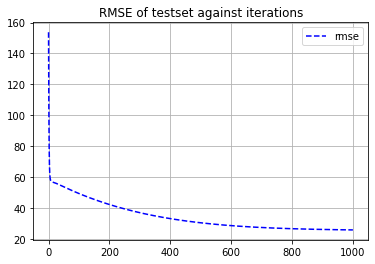

In [752]:
def plot_rmse_convergence(rmse):
    plt.plot(range(len(rmse)), rmse, 'b--', label='rmse')
    plt.title('RMSE of testset against iterations')
    plt.grid()
    plt.legend()
    plt.show()
    
plot_rmse_convergence(rmse_airq)

The same steps were applied on Wine quality data, and it converged after 241 steps

In [753]:
r, i_max = 0.0001, 1000
teta_wine, loss_wine, rmse_wine = GSD(wine_train_x, wine_train_y, i_max, r, wine_test_x, wine_test_y)

Loss val:  11.86693972530678 i 0
Loss val:  10.213283290809743 i 1
Loss val:  9.836455193467996 i 2
Loss val:  9.554473127771706 i 3
Loss val:  9.287202233319166 i 4
Loss val:  9.028947521454954 i 5
Loss val:  8.779052213252488 i 6
Loss val:  8.53720931759771 i 7
Loss val:  8.303144595987341 i 8
Loss val:  8.076594825938967 i 9
Loss val:  7.85730602314978 i 10
Loss val:  7.645033022814633 i 11
Loss val:  7.439539163314148 i 12
Loss val:  7.2405959870025525 i 13
Loss val:  7.04798295197397 i 14
Loss val:  6.861487154045324 i 15
Loss val:  6.680903058568678 i 16
Loss val:  6.50603224172258 i 17
Loss val:  6.336683140946326 i 18
Loss val:  6.172670814192943 i 19
Loss val:  6.013816707688443 i 20
Loss val:  5.859948431895658 i 21
Loss val:  5.7108995453918805 i 22
Loss val:  5.566509346379804 i 23
Loss val:  5.426622671561379 i 24
Loss val:  5.291089702113384 i 25
Loss val:  5.159765776513337 i 26
Loss val:  5.032511209972699 i 27
Loss val:  4.909191120243533 i 28
Loss val:  4.789675259572

Plot of RMSE convergence graph for wine quality data learning, and the latest rmse value was less that 1, which shows how the data was trained well

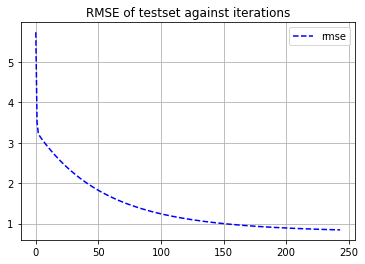

In [754]:
plot_rmse_convergence(rmse_wine)

Model learning steps for Parkinsons dataset after 1000 iterations

In [749]:
r, i_max = 0.00001, 1000
teta_parkinson, loss_parkinson, rmse_parkinson = GSD(parkinson_train_x, parkinson_train_y,\
                                                     i_max, r, parkinson_test_x, parkinson_test_y)

Loss val:  537.6948673955419 i 0
Loss val:  343.9735333890674 i 1
Loss val:  252.24405790102193 i 2
Loss val:  207.72802702900495 i 3
Loss val:  185.11189038321473 i 4
Loss val:  172.6962170998996 i 5
Loss val:  165.07200070778993 i 6
Loss val:  159.73680782895534 i 7
Loss val:  155.53129531316887 i 8
Loss val:  151.91681191021576 i 9
Loss val:  148.64161545936605 i 10
Loss val:  145.58664648597727 i 11
Loss val:  142.69426437962056 i 12
Loss val:  139.93531586663264 i 13
Loss val:  137.29391475969592 i 14
Loss val:  134.76040522707942 i 15
Loss val:  132.32810636204655 i 16
Loss val:  129.99180404038026 i 17
Loss val:  127.74705026243404 i 18
Loss val:  125.58983574532282 i 19
Loss val:  123.51643512465084 i 20
Loss val:  121.52333205531143 i 21
Loss val:  119.6071813692576 i 22
Loss val:  117.76478848961601 i 23
Loss val:  115.99309694685701 i 24
Loss val:  114.28917976201336 i 25
Loss val:  112.65023273504968 i 26
Loss val:  111.0735687270045 i 27
Loss val:  109.55661251007048 i 28


Loss val:  53.550902595252495 i 237
Loss val:  53.45985150145911 i 238
Loss val:  53.36901351113435 i 239
Loss val:  53.27838778519131 i 240
Loss val:  53.18797349937119 i 241
Loss val:  53.097769843685455 i 242
Loss val:  53.007776021885945 i 243
Loss val:  52.917991250954934 i 244
Loss val:  52.828414760614066 i 245
Loss val:  52.73904579285725 i 246
Loss val:  52.64988360149972 i 247
Loss val:  52.56092745174724 i 248
Loss val:  52.47217661978202 i 249
Loss val:  52.38363039236654 i 250
Loss val:  52.29528806646229 i 251
Loss val:  52.20714894886674 i 252
Loss val:  52.11921235586045 i 253
Loss val:  52.0314776128745 i 254
Loss val:  51.943944054166515 i 255
Loss val:  51.856611022512745 i 256
Loss val:  51.769477868912276 i 257
Loss val:  51.68254395230195 i 258
Loss val:  51.595808639285046 i 259
Loss val:  51.50927130386855 i 260
Loss val:  51.422931327214215 i 261
Loss val:  51.33678809739591 i 262
Loss val:  51.25084100917137 i 263
Loss val:  51.16508946375815 i 264
Loss val:  

Loss val:  36.95294319047489 i 471
Loss val:  36.89872669498909 i 472
Loss val:  36.84462737985393 i 473
Loss val:  36.790644977226286 i 474
Loss val:  36.73677921996007 i 475
Loss val:  36.683029841601815 i 476
Loss val:  36.62939657639015 i 477
Loss val:  36.575879159252196 i 478
Loss val:  36.522477325802726 i 479
Loss val:  36.46919081233989 i 480
Loss val:  36.416019355845954 i 481
Loss val:  36.362962693981615 i 482
Loss val:  36.310020565086496 i 483
Loss val:  36.25719270817593 i 484
Loss val:  36.20447886293837 i 485
Loss val:  36.15187876973377 i 486
Loss val:  36.09939216959157 i 487
Loss val:  36.0470188042076 i 488
Loss val:  35.99475841594281 i 489
Loss val:  35.94261074782154 i 490
Loss val:  35.89057554352748 i 491
Loss val:  35.83865254740362 i 492
Loss val:  35.78684150444892 i 493
Loss val:  35.73514216031667 i 494
Loss val:  35.68355426131212 i 495
Loss val:  35.63207755439074 i 496
Loss val:  35.58071178715574 i 497
Loss val:  35.529456707856326 i 498
Loss val:  35

Loss val:  27.03576970209052 i 703
Loss val:  27.00276758051584 i 704
Loss val:  26.969835397293934 i 705
Loss val:  26.93697300040148 i 706
Loss val:  26.90418023816638 i 707
Loss val:  26.871456959267814 i 708
Loss val:  26.838803012734587 i 709
Loss val:  26.80621824794451 i 710
Loss val:  26.773702514623587 i 711
Loss val:  26.741255662844605 i 712
Loss val:  26.708877543026773 i 713
Loss val:  26.6765680059343 i 714
Loss val:  26.644326902675985 i 715
Loss val:  26.612154084703853 i 716
Loss val:  26.5800494038126 i 717
Loss val:  26.54801271213837 i 718
Loss val:  26.516043862158146 i 719
Loss val:  26.484142706688658 i 720
Loss val:  26.45230909888584 i 721
Loss val:  26.4205428922431 i 722
Loss val:  26.388843940591247 i 723
Loss val:  26.357212098097637 i 724
Loss val:  26.32564721926443 i 725
Loss val:  26.29414915892859 i 726
Loss val:  26.262717772260768 i 727
Loss val:  26.23135291476413 i 728
Loss val:  26.20005444227367 i 729
Loss val:  26.168822210955632 i 730
Loss val:

Loss val:  20.977944764126942 i 935
Loss val:  20.95772175927064 i 936
Loss val:  20.937541235067474 i 937
Loss val:  20.91740310119357 i 938
Loss val:  20.897307267522088 i 939
Loss val:  20.87725364412378 i 940
Loss val:  20.857242141265424 i 941
Loss val:  20.837272669410464 i 942
Loss val:  20.817345139217306 i 943
Loss val:  20.797459461540264 i 944
Loss val:  20.77761554742798 i 945
Loss val:  20.757813308123495 i 946
Loss val:  20.73805265506351 i 947
Loss val:  20.718333499878334 i 948
Loss val:  20.698655754391112 i 949
Loss val:  20.679019330617493 i 950
Loss val:  20.65942414076504 i 951
Loss val:  20.63987009723308 i 952
Loss val:  20.620357112611558 i 953
Loss val:  20.60088509968196 i 954
Loss val:  20.581453971415325 i 955
Loss val:  20.56206364097267 i 956
Loss val:  20.542714021704327 i 957
Loss val:  20.523405027149778 i 958
Loss val:  20.504136571036547 i 959
Loss val:  20.48490856728066 i 960
Loss val:  20.465720929985366 i 961
Loss val:  20.446573573441327 i 962
Lo

RMSE convergence graph, and the latest values os just below 5,which is still not enough to coinsider converged model parameters as optimized

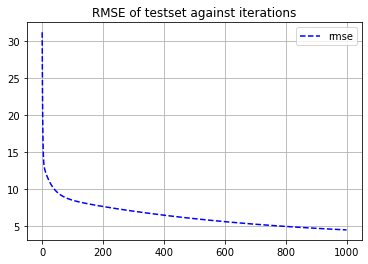

In [750]:
plot_rmse_convergence(rmse_parkinson)

Gradient descent with line search

In [757]:
def GSD_backtracking(X_train, Y_train, i_max, X_test, Y_test):
    r, alpha, beta = 1, 0.1, 0.1
    teta = [0]*X_train.shape[1]
    L, Y_PRED = lossFunc(X_train, Y_train, teta)
    RMSE = []
    y_pred_test = np.matmul(X_test, teta)
    RMSE.append(np.power(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0], 1/2))
    
    for i in range(i_max):
        diff = np.subtract(Y_train, Y_PRED)
        loss_deriv = (-2/len(Y_train)*np.matmul(X_train.transpose(), diff))
        while lossFunc(X_train, Y_train, np.subtract(teta, r*loss_deriv))[0] > (L - (alpha * r * np.matmul(loss_deriv.T, loss_deriv))):
            r *= beta
            teta = np.subtract(teta, r*loss_deriv)
            L, Y_PRED = lossFunc(X_train, Y_train, teta)
            diff = np.subtract(Y_train, Y_PRED)
            loss_deriv = (-2/len(Y_train)*np.matmul(X_train.transpose(), diff))
            print(r)
            
        teta = np.subtract(teta, r*loss_deriv)
        y_pred_test = np.matmul(X_test, teta)
        RMSE.append(np.power(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0], 1/2))
        L_PREV = L
        L, Y_PRED = lossFunc(X_train, Y_train, teta)
        if L_PREV - L <= 0.001: break #convergence criteria
        print('Loss val: ',L, "i", i)
        #print('teta: ',teta)
    return teta, RMSE

In [758]:
i_max = 1000
teta_airq_bc, rmse_airq_bc = GSD_backtracking(airq_train_x, airq_train_y, i_max, airq_test_x, airq_test_y)

0.1
0.010000000000000002
0.0010000000000000002
0.00010000000000000003
1.0000000000000004e-05
1.0000000000000004e-06
1.0000000000000005e-07
Loss val:  2.8704729042293025e+40 i 0
Loss val:  9.879437035460966e+39 i 1
Loss val:  3.400250770637223e+39 i 2
Loss val:  1.1702797946309421e+39 i 3
Loss val:  4.0278054601019985e+38 i 4
Loss val:  1.3862683613423565e+38 i 5
Loss val:  4.77118481171706e+37 i 6
Loss val:  1.6421219157671292e+37 i 7
Loss val:  5.651777702368321e+36 i 8
Loss val:  1.9452073646014048e+36 i 9
Loss val:  6.69498085176823e+35 i 10
Loss val:  2.3042978187267782e+35 i 11
Loss val:  7.93123780333596e+34 i 12
Loss val:  2.7300632630648624e+34 i 13
Loss val:  9.398755447837099e+33 i 14
Loss val:  3.236799250853137e+33 i 15
Loss val:  1.1155583731132277e+33 i 16
Loss val:  3.851318585103204e+32 i 17
Loss val:  1.3346780181890271e+32 i 18
Loss val:  4.664303992542941e+31 i 19
Loss val:  1.6599220642009106e+31 i 20
Loss val:  6.134604639882193e+30 i 21
Loss val:  2.43695531071042

Loss val:  6.1687827549884056e+16 i 208
Loss val:  6.143112424559109e+16 i 209
Loss val:  6.117548920745144e+16 i 210
Loss val:  6.092091798092811e+16 i 211
Loss val:  6.06674061321005e+16 i 212
Loss val:  6.0414949247105416e+16 i 213
Loss val:  6.0163542931687496e+16 i 214
Loss val:  5.991318281083536e+16 i 215
Loss val:  5.966386452848352e+16 i 216
Loss val:  5.941558374726446e+16 i 217
Loss val:  5.916833614830166e+16 i 218
Loss val:  5.892211743103137e+16 i 219
Loss val:  5.867692331304899e+16 i 220
Loss val:  5.843274952997387e+16 i 221
Loss val:  5.818959183532777e+16 i 222
Loss val:  5.7947446000424744e+16 i 223
Loss val:  5.770630781426898e+16 i 224
Loss val:  5.746617308346102e+16 i 225
Loss val:  5.722703763210682e+16 i 226
Loss val:  5.698889730173283e+16 i 227
Loss val:  5.675174795120377e+16 i 228
Loss val:  5.6515585456642264e+16 i 229
Loss val:  5.628040571135197e+16 i 230
Loss val:  5.604620462574117e+16 i 231
Loss val:  5.581297812724817e+16 i 232
Loss val:  5.55807221

Loss val:  2.5804657174986664e+16 i 417
Loss val:  2.569727560329166e+16 i 418
Loss val:  2.559034088128068e+16 i 419
Loss val:  2.5483851149466776e+16 i 420
Loss val:  2.5377804556100772e+16 i 421
Loss val:  2.527219925713922e+16 i 422
Loss val:  2.5167033416212496e+16 i 423
Loss val:  2.5062305204592516e+16 i 424
Loss val:  2.4958012801161276e+16 i 425
Loss val:  2.4854154392378956e+16 i 426
Loss val:  2.4750728172252504e+16 i 427
Loss val:  2.464773234230413e+16 i 428
Loss val:  2.4545165111540236e+16 i 429
Loss val:  2.4443024696419936e+16 i 430
Loss val:  2.4341309320824388e+16 i 431
Loss val:  2.424001721602576e+16 i 432
Loss val:  2.4139146620656348e+16 i 433
Loss val:  2.403869578067816e+16 i 434
Loss val:  2.393866294935243e+16 i 435
Loss val:  2.3839046387208828e+16 i 436
Loss val:  2.373984436201587e+16 i 437
Loss val:  2.364105514875028e+16 i 438
Loss val:  2.354267702956722e+16 i 439
Loss val:  2.3444708293770228e+16 i 440
Loss val:  2.3347147237781868e+16 i 441
Loss val: 

Loss val:  1.0884757755555102e+16 i 624
Loss val:  1.0839462743035722e+16 i 625
Loss val:  1.079435621780903e+16 i 626
Loss val:  1.0749437395517998e+16 i 627
Loss val:  1.0704705495069576e+16 i 628
Loss val:  1.066015973862113e+16 i 629
Loss val:  1.061579935156686e+16 i 630
Loss val:  1.0571623562524332e+16 i 631
Loss val:  1.0527631603321114e+16 i 632
Loss val:  1.0483822708981406e+16 i 633
Loss val:  1.0440196117712646e+16 i 634
Loss val:  1.0396751070892418e+16 i 635
Loss val:  1.0353486813055162e+16 i 636
Loss val:  1.0310402591879036e+16 i 637
Loss val:  1.0267497658172866e+16 i 638
Loss val:  1.0224771265863082e+16 i 639
Loss val:  1.0182222671980834e+16 i 640
Loss val:  1.0139851136648922e+16 i 641
Loss val:  1.0097655923069108e+16 i 642
Loss val:  1.0055636297509118e+16 i 643
Loss val:  1.0013791529290044e+16 i 644
Loss val:  9972120890773556.0 i 645
Loss val:  9930623657349256.0 i 646
Loss val:  9889299107422062.0 i 647
Loss val:  9848146522399710.0 i 648
Loss val:  98071651

Loss val:  4241605750344366.5 i 850
Loss val:  4223955055614712.5 i 851
Loss val:  4206377811169304.5 i 852
Loss val:  4188873711357595.0 i 853
Loss val:  4171442451800948.0 i 854
Loss val:  4154083729387342.5 i 855
Loss val:  4136797242266097.5 i 856
Loss val:  4119582689842651.0 i 857
Loss val:  4102439772773300.0 i 858
Loss val:  4085368192959997.0 i 859
Loss val:  4068367653545208.5 i 860
Loss val:  4051437858906695.5 i 861
Loss val:  4034578514652406.5 i 862
Loss val:  4017789327615352.5 i 863
Loss val:  4001070005848513.5 i 864
Loss val:  3984420258619743.5 i 865
Loss val:  3967839796406726.0 i 866
Loss val:  3951328330891974.0 i 867
Loss val:  3934885574957742.5 i 868
Loss val:  3918511242681092.5 i 869
Loss val:  3902205049328906.0 i 870
Loss val:  3885966711352926.5 i 871
Loss val:  3869795946384864.5 i 872
Loss val:  3853692473231398.0 i 873
Loss val:  3837656011869378.5 i 874
Loss val:  3821686283440939.0 i 875
Loss val:  3805783010248598.0 i 876
Loss val:  3789945915750493.

Gradient descent with bol driver

In [762]:
def GSD_bolddriver(X_train, Y_train, i_max, X_test, Y_test):
    r, r_neg, r_pos = 1, 0.1, 1.1
    teta = [0]*X_train.shape[1]
    L, Y_PRED = lossFunc(X_train, Y_train, teta)
    
    RMSE = []
    
    y_pred_test = np.matmul(X_test, teta)
    RMSE.append(np.power(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0], 1/2))
    
    for i in range(i_max):
        r = r*r_pos
        diff = np.subtract(Y_train, Y_PRED)
        loss_deriv = (-2/len(Y_train)*np.matmul(X_train.transpose(), diff))
        while L - lossFunc(X_train, Y_train, np.subtract(teta, r*loss_deriv))[0] <= 0:
            r *= r_neg
            teta = np.subtract(teta, r*loss_deriv)
            L, Y_PRED = lossFunc(X_train, Y_train, teta)
            diff = np.subtract(Y_train, Y_PRED)
            loss_deriv = (-2/len(Y_train)*np.matmul(X_train.transpose(), diff))
            print(r)
        
        
        teta = np.subtract(teta, r*loss_deriv)
        y_pred_test = np.matmul(X_test, teta)
        RMSE.append(np.power(np.sum((np.subtract(Y_test, y_pred_test))**2)/Y_test.shape[0], 1/2))
        L_PREV = L
        L, Y_PRED = lossFunc(X_train, Y_train, teta)
        if L_PREV - L <= 0.001: break #convergence criteria
        print('Loss val: ',L, "i", i)
        #print('teta: ',teta)
    return teta

In [763]:
i_max = 1000
teta_airq_bd, rmse_airq_bd = GSD_bolddriver(airq_train_x, airq_train_y, i_max, airq_test_x, airq_test_y)

0.11000000000000001
0.011000000000000003
0.0011000000000000003
0.00011000000000000003
1.1000000000000003e-05
1.1000000000000003e-06
1.1000000000000003e-07
Loss val:  6.652051552782512e+39 i 0
Loss val:  1.662104358992566e+39 i 1
Loss val:  3.363516520597386e+38 i 2
Loss val:  5.243560477092557e+37 i 3
Loss val:  5.860842275121802e+36 i 4
Loss val:  4.2028822921935165e+35 i 5
Loss val:  1.598047211390394e+34 i 6
Loss val:  2.5152655930392314e+32 i 7
Loss val:  2.308491581996356e+31 i 8
Loss val:  1.0790644922701446e+31 i 9
Loss val:  4.6180367864329914e+30 i 10
Loss val:  1.773060798774322e+30 i 11
Loss val:  5.997430652769462e+29 i 12
Loss val:  1.7472634853472046e+29 i 13
Loss val:  4.25930162269014e+28 i 14
Loss val:  8.362776531678453e+27 i 15
Loss val:  1.2552154585720704e+27 i 16
Loss val:  1.3361907527880292e+26 i 17
Loss val:  9.172117375200047e+24 i 18
Loss val:  1.0383433041361932e+24 i 19
7.400249944258173e-08
Loss val:  3.158452750169293e+23 i 20
Loss val:  2.154532976292626

Loss val:  2012053052858045.0 i 206
Loss val:  2008273009668636.8 i 207
Loss val:  2004250054413978.0 i 208
Loss val:  1999938284548955.0 i 209
Loss val:  1995287940267917.0 i 210
Loss val:  1990246338158986.2 i 211
Loss val:  1984758661622925.8 i 212
Loss val:  1978768464707789.0 i 213
Loss val:  1972217800568433.5 i 214
Loss val:  1965046964319457.5 i 215
Loss val:  1957193920783181.5 i 216
Loss val:  1948593545405471.8 i 217
Loss val:  1939176823595199.8 i 218
Loss val:  1928870128343767.0 i 219
Loss val:  1917594644200617.0 i 220
Loss val:  1905265952752481.2 i 221
Loss val:  1891793761509517.5 i 222
Loss val:  1877081751023993.2 i 223
Loss val:  1861027526602379.8 i 224
Loss val:  1843522678378822.8 i 225
Loss val:  1824452968002242.0 i 226
Loss val:  1803698669708090.5 i 227
Loss val:  1781135099901924.8 i 228
Loss val:  1756633374589247.8 i 229
Loss val:  1730061438914624.2 i 230
Loss val:  1701285417756506.2 i 231
Loss val:  1670171340448073.5 i 232
Loss val:  1636587295768536.

Loss val:  6071547382627.988 i 433
Loss val:  5817974191036.098 i 434
Loss val:  5550980165849.734 i 435
Loss val:  5271096326901.776 i 436
Loss val:  4979128376355.395 i 437
Loss val:  4676188884864.886 i 438
Loss val:  4363725458206.1504 i 439
Loss val:  4043542140874.953 i 440
Loss val:  3717810818474.9844 i 441
Loss val:  3389068982186.611 i 442
Loss val:  3060200036461.755 i 443
Loss val:  2734395187131.9004 i 444
Loss val:  2415432744575.1064 i 445
Loss val:  2158848892118.8162 i 446
3.4988308801293725e-07
3.4988308801293725e-08
Loss val:  2074546094015.0447 i 447
Loss val:  2069669758786.8774 i 448
Loss val:  2064825447990.3215 i 449
Loss val:  2059935713074.5588 i 450
Loss val:  2054914390404.1106 i 451
Loss val:  2049670605786.0037 i 452
Loss val:  2044112639067.0222 i 453
Loss val:  2038151070174.4744 i 454
Loss val:  2031700751050.3284 i 455
Loss val:  2024681387402.375 i 456
Loss val:  2017016811287.3352 i 457
Loss val:  2008633292011.2468 i 458
Loss val:  1999457383605.153

Loss val:  10805706735.443298 i 658
Loss val:  10716595610.050062 i 659
Loss val:  10619437964.197374 i 660
Loss val:  10513601189.362349 i 661
Loss val:  10398422512.378471 i 662
Loss val:  10273211978.548485 i 663
Loss val:  10137256702.095129 i 664
Loss val:  9989826628.30866 i 665
Loss val:  9830182076.989477 i 666
Loss val:  9657583358.67645 i 667
Loss val:  9471302770.915155 i 668
Loss val:  9270639287.754595 i 669
Loss val:  9054936246.99758 i 670
Loss val:  8823602310.49102 i 671
Loss val:  8576135915.659111 i 672
Loss val:  8312153343.006342 i 673
Loss val:  8031420384.797246 i 674
Loss val:  7733887404.233228 i 675
Loss val:  7419727311.991185 i 676
Loss val:  7089375649.166847 i 677
Loss val:  6743571547.008266 i 678
Loss val:  6383397834.869489 i 679
Loss val:  6010317998.634342 i 680
Loss val:  5626207076.431755 i 681
Loss val:  5233372960.533712 i 682
Loss val:  4834564079.2944975 i 683
Loss val:  4432963390.140434 i 684
Loss val:  4032551284.8832197 i 685
Loss val:  3680

Loss val:  263946153.19528618 i 884
Loss val:  263839184.5437726 i 885
Loss val:  263725423.3107139 i 886
Loss val:  263603317.16805926 i 887
Loss val:  263471257.27150595 i 888
Loss val:  263327606.89921963 i 889
Loss val:  263170715.69809726 i 890
Loss val:  262998917.48418635 i 891
Loss val:  262810512.91765195 i 892
Loss val:  262603741.25104573 i 893
Loss val:  262376746.81033227 i 894
Loss val:  262127545.5162476 i 895
Loss val:  261853994.94088486 i 896
Loss val:  261553769.04948053 i 897
Loss val:  261224336.9035492 i 898
Loss val:  260862943.75414908 i 899
Loss val:  260466593.05047223 i 900
Loss val:  260032028.44673198 i 901
Loss val:  259555715.44338772 i 902
Loss val:  259033822.64482066 i 903
Loss val:  258462202.7814247 i 904
Loss val:  257836373.72520578 i 905
Loss val:  257151499.78745437 i 906
Loss val:  256402373.64693147 i 907
Loss val:  255583399.3206681 i 908
Loss val:  254688576.65589345 i 909
Loss val:  253711487.888151 i 910
Loss val:  252645286.87388554 i 911


ValueError: too many values to unpack (expected 2)

In [550]:
i_max = 1000
teta_wine = GSD_bd(wine_train_x, wine_train_y, i_max)

0.11000000000000001
0.011000000000000003
0.0011000000000000003
0.00011000000000000003
Loss val:  5616916882.713394 i 0
Loss val:  61320069.05309066 i 1
Loss val:  14973.23991321534 i 2
Loss val:  1329.7919847681985 i 3
Loss val:  1167.6129492413274 i 4
Loss val:  1091.7133667049789 i 5
Loss val:  1016.5669402655551 i 6
Loss val:  939.9544674984747 i 7
Loss val:  862.2207879398242 i 8
Loss val:  783.9682206390294 i 9
Loss val:  705.9006056581051 i 10
Loss val:  628.7970771265809 i 11
Loss val:  553.5007177093466 i 12
Loss val:  480.93869841264643 i 13
Loss val:  412.3624010790051 i 14
Loss val:  351.3109565552095 i 15
Loss val:  321.72007387236533 i 16
5.559917313492241e-05
Loss val:  279.76717333158155 i 17
Loss val:  270.8410179447822 i 18
Loss val:  263.45710301587917 i 19
Loss val:  256.28940549511316 i 20
Loss val:  248.83258889544436 i 21
Loss val:  240.922628496655 i 22
Loss val:  232.51409124853797 i 23
Loss val:  223.59739656039343 i 24
Loss val:  214.1755944259234 i 25
Loss va

In [527]:
i_max = 1000
teta_airq = GSD_b(airq_train_x, airq_train_y, i_max)

1.0000000000000005e-07
Loss val:  1.4248893913723855e+54 i 0
1.0000000000000005e-07
Loss val:  4.904106533255024e+53 i 1
1.0000000000000005e-07
Loss val:  1.687868619397601e+53 i 2
1.0000000000000005e-07
Loss val:  5.809214092945637e+52 i 3
1.0000000000000005e-07
Loss val:  1.999383604298529e+52 i 4
1.0000000000000005e-07
Loss val:  6.881369406087292e+51 i 5
1.0000000000000005e-07
Loss val:  2.368392199965182e+51 i 6
1.0000000000000005e-07
Loss val:  8.151403297439101e+50 i 7
1.0000000000000005e-07
Loss val:  2.805505724360155e+50 i 8
1.0000000000000005e-07
Loss val:  9.655838248977476e+49 i 9
1.0000000000000005e-07
Loss val:  3.3232950791362585e+49 i 10
1.0000000000000005e-07
Loss val:  1.1437946229369954e+49 i 11
1.0000000000000005e-07
Loss val:  3.936658104985191e+48 i 12
1.0000000000000005e-07
Loss val:  1.3549038348555598e+48 i 13
1.0000000000000005e-07
Loss val:  4.663282995460927e+47 i 14
1.0000000000000005e-07
Loss val:  1.6050210774861719e+47 i 15
1.0000000000000005e-07
Loss v

1.0000000000000005e-07
Loss val:  2.331509068955258e+29 i 135
1.0000000000000005e-07
Loss val:  1.8006939164194226e+29 i 136
1.0000000000000005e-07
Loss val:  1.3907477741280368e+29 i 137
1.0000000000000005e-07
Loss val:  1.0741481461465541e+29 i 138
1.0000000000000005e-07
Loss val:  8.296395508815326e+28 i 139
1.0000000000000005e-07
Loss val:  6.408064895758897e+28 i 140
1.0000000000000005e-07
Loss val:  4.949713572416205e+28 i 141
1.0000000000000005e-07
Loss val:  3.8234330496016555e+28 i 142
1.0000000000000005e-07
Loss val:  2.953609106290819e+28 i 143
1.0000000000000005e-07
Loss val:  2.2818452697164653e+28 i 144
1.0000000000000005e-07
Loss val:  1.7630422452430415e+28 i 145
1.0000000000000005e-07
Loss val:  1.3623700802896189e+28 i 146
1.0000000000000005e-07
Loss val:  1.052929782152072e+28 i 147
1.0000000000000005e-07
Loss val:  8.139473975136909e+27 i 148
1.0000000000000005e-07
Loss val:  6.29379309370244e+27 i 149
1.0000000000000005e-07
Loss val:  4.8683511504217185e+27 i 150
1

1.0000000000000005e-07
Loss val:  2.1023613161580904e+25 i 267
1.0000000000000005e-07
Loss val:  2.093612706415751e+25 i 268
1.0000000000000005e-07
Loss val:  2.0849005024893243e+25 i 269
1.0000000000000005e-07
Loss val:  2.0762245528819354e+25 i 270
1.0000000000000005e-07
Loss val:  2.0675847067272363e+25 i 271
1.0000000000000005e-07
Loss val:  2.0589808137867595e+25 i 272
1.0000000000000005e-07
Loss val:  2.0504127244472683e+25 i 273
1.0000000000000005e-07
Loss val:  2.0418802897181815e+25 i 274
1.0000000000000005e-07
Loss val:  2.0333833612289314e+25 i 275
1.0000000000000005e-07
Loss val:  2.024921791226417e+25 i 276
1.0000000000000005e-07
Loss val:  2.0164954325723736e+25 i 277
1.0000000000000005e-07
Loss val:  2.008104138740875e+25 i 278
1.0000000000000005e-07
Loss val:  1.9997477638157267e+25 i 279
1.0000000000000005e-07
Loss val:  1.991426162487961e+25 i 280
1.0000000000000005e-07
Loss val:  1.9831391900532844e+25 i 281
1.0000000000000005e-07
Loss val:  1.9748867024095856e+25 i 

1.0000000000000005e-07
Loss val:  1.2174884885104007e+25 i 398
1.0000000000000005e-07
Loss val:  1.2124221227627688e+25 i 399
1.0000000000000005e-07
Loss val:  1.207376839812794e+25 i 400
1.0000000000000005e-07
Loss val:  1.2023525519280915e+25 i 401
1.0000000000000005e-07
Loss val:  1.1973491717413613e+25 i 402
1.0000000000000005e-07
Loss val:  1.1923666122488529e+25 i 403
1.0000000000000005e-07
Loss val:  1.1874047868088853e+25 i 404
1.0000000000000005e-07
Loss val:  1.1824636091403139e+25 i 405
1.0000000000000005e-07
Loss val:  1.177542993321032e+25 i 406
1.0000000000000005e-07
Loss val:  1.1726428537864937e+25 i 407
1.0000000000000005e-07
Loss val:  1.1677631053282092e+25 i 408
1.0000000000000005e-07
Loss val:  1.1629036630922669e+25 i 409
1.0000000000000005e-07
Loss val:  1.158064442577865e+25 i 410
1.0000000000000005e-07
Loss val:  1.1532453596358332e+25 i 411
1.0000000000000005e-07
Loss val:  1.1484463304671777e+25 i 412
1.0000000000000005e-07
Loss val:  1.143667271621613e+25 i 

1.0000000000000005e-07
Loss val:  7.021200371506022e+24 i 530
1.0000000000000005e-07
Loss val:  6.991982873468831e+24 i 531
1.0000000000000005e-07
Loss val:  6.962886958954659e+24 i 532
1.0000000000000005e-07
Loss val:  6.93391212201486e+24 i 533
1.0000000000000005e-07
Loss val:  6.905057858806242e+24 i 534
1.0000000000000005e-07
Loss val:  6.876323667582231e+24 i 535
1.0000000000000005e-07
Loss val:  6.847709048684197e+24 i 536
1.0000000000000005e-07
Loss val:  6.819213504532748e+24 i 537
1.0000000000000005e-07
Loss val:  6.790836539619099e+24 i 538
1.0000000000000005e-07
Loss val:  6.76257766049641e+24 i 539
1.0000000000000005e-07
Loss val:  6.734436375771275e+24 i 540
1.0000000000000005e-07
Loss val:  6.706412196095068e+24 i 541
1.0000000000000005e-07
Loss val:  6.678504634155586e+24 i 542
1.0000000000000005e-07
Loss val:  6.650713204668423e+24 i 543
1.0000000000000005e-07
Loss val:  6.623037424368635e+24 i 544
1.0000000000000005e-07
Loss val:  6.595476812002288e+24 i 545
1.00000000

1.0000000000000005e-07
Loss val:  4.0154651569565444e+24 i 664
1.0000000000000005e-07
Loss val:  3.998755501825794e+24 i 665
1.0000000000000005e-07
Loss val:  3.9821153810104667e+24 i 666
1.0000000000000005e-07
Loss val:  3.9655445051556455e+24 i 667
1.0000000000000005e-07
Loss val:  3.94904258611049e+24 i 668
1.0000000000000005e-07
Loss val:  3.9326093369232624e+24 i 669
1.0000000000000005e-07
Loss val:  3.916244471836313e+24 i 670
1.0000000000000005e-07
Loss val:  3.89994770628114e+24 i 671
1.0000000000000005e-07
Loss val:  3.8837187568734214e+24 i 672
1.0000000000000005e-07
Loss val:  3.8675573414080705e+24 i 673
1.0000000000000005e-07
Loss val:  3.85146317885436e+24 i 674
1.0000000000000005e-07
Loss val:  3.835435989351032e+24 i 675
1.0000000000000005e-07
Loss val:  3.819475494201415e+24 i 676
1.0000000000000005e-07
Loss val:  3.8035814158685735e+24 i 677
1.0000000000000005e-07
Loss val:  3.787753477970515e+24 i 678
1.0000000000000005e-07
Loss val:  3.7719914052753357e+24 i 679
1.0

1.0000000000000005e-07
Loss val:  2.3157005632564143e+24 i 796
1.0000000000000005e-07
Loss val:  2.306064181986052e+24 i 797
1.0000000000000005e-07
Loss val:  2.2964679008351634e+24 i 798
1.0000000000000005e-07
Loss val:  2.286911552934091e+24 i 799
1.0000000000000005e-07
Loss val:  2.2773949721075808e+24 i 800
1.0000000000000005e-07
Loss val:  2.267917992871885e+24 i 801
1.0000000000000005e-07
Loss val:  2.2584804504318863e+24 i 802
1.0000000000000005e-07
Loss val:  2.2490821806782416e+24 i 803
1.0000000000000005e-07
Loss val:  2.2397230201845055e+24 i 804
1.0000000000000005e-07
Loss val:  2.2304028062043203e+24 i 805
1.0000000000000005e-07
Loss val:  2.2211213766685513e+24 i 806
1.0000000000000005e-07
Loss val:  2.2118785701824935e+24 i 807
1.0000000000000005e-07
Loss val:  2.2026742260230754e+24 i 808
1.0000000000000005e-07
Loss val:  2.193508184136019e+24 i 809
1.0000000000000005e-07
Loss val:  2.1843802851330925e+24 i 810
1.0000000000000005e-07
Loss val:  2.1752903702893422e+24 i 

1.0000000000000005e-07
Loss val:  1.3354541355732822e+24 i 928
1.0000000000000005e-07
Loss val:  1.3298968787646087e+24 i 929
1.0000000000000005e-07
Loss val:  1.3243627475101832e+24 i 930
1.0000000000000005e-07
Loss val:  1.3188516455770438e+24 i 931
1.0000000000000005e-07
Loss val:  1.313363477132685e+24 i 932
1.0000000000000005e-07
Loss val:  1.307898146743391e+24 i 933
1.0000000000000005e-07
Loss val:  1.3024555593725784e+24 i 934
1.0000000000000005e-07
Loss val:  1.29703562037914e+24 i 935
1.0000000000000005e-07
Loss val:  1.2916382355158033e+24 i 936
1.0000000000000005e-07
Loss val:  1.2862633109274892e+24 i 937
1.0000000000000005e-07
Loss val:  1.2809107531496793e+24 i 938
1.0000000000000005e-07
Loss val:  1.275580469106792e+24 i 939
1.0000000000000005e-07
Loss val:  1.2702723661105609e+24 i 940
1.0000000000000005e-07
Loss val:  1.26498635185843e+24 i 941
1.0000000000000005e-07
Loss val:  1.2597223344319427e+24 i 942
1.0000000000000005e-07
Loss val:  1.254480222295143e+24 i 943
